In [2]:
!pip install seaborn
import seaborn as sns
import pandas as pd
import numpy as np
import boto3
import sagemaker
import time
import warnings

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
warnings.filterwarnings('ignore')

X_train= pd.read_csv("s3://pollution-predictor-1/X_train.csv")
X_test= pd.read_csv("s3://pollution-predictor-1/X_test.csv") 
y_train= pd.read_csv("s3://pollution-predictor-1/y_train.csv") 
y_test= pd.read_csv("s3://pollution-predictor-1/y_test.csv") 

del X_train['Unnamed: 24']
del X_test['Unnamed: 24']
#del X_train['NO2 1st Max Hour']
#del X_test['NO2 1st Max Hour']
#del X_train['NO2 1st Max Value']
#del X_test['NO2 1st Max Value']
#del X_train['NO2 Mean']
#del X_test['NO2 Mean']
print("Running")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
Running


11 0.9424655188963023 16.463547468185425
12 0.9422477062793237 16.654886722564697
13 0.9418000540257412 17.369649171829224


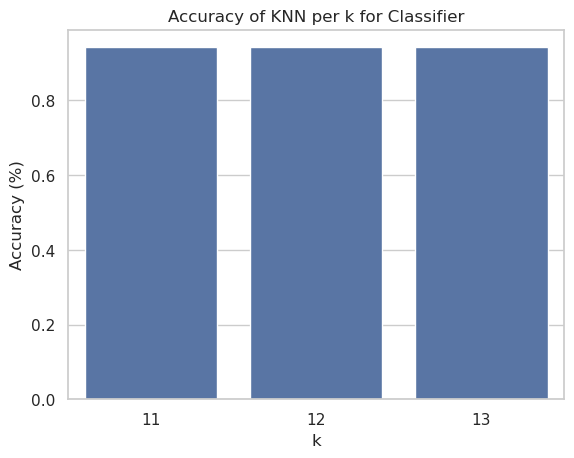

The best accuracy for Sklearn KNN is at k = 11 with accuracy 94.24655188963023%
Time Taken: 50.76379919052124


In [12]:
def plot_accuracy(accuracy_per_k, classifier_name):
    k_values = list(accuracy_per_k.keys())
    accuracy = list(accuracy_per_k.values())

    sns.set(style="whitegrid")
    df = pd.DataFrame({
        'k': k_values,
        'accuracy': accuracy
    })
    sns.barplot(x='k', y='accuracy', data=df)

    plt.xlabel("k")
    plt.ylabel("Accuracy (%)")
    plt.title(f"Accuracy of KNN per k for {classifier_name}")
    plt.show()

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report

def find_best_k(X_train, X_test, y_train, y_test):
    best_k = 0
    best_accuracy = 0
    accuracy_per_k = {}

    for k in range(11,14):
        t_=time.time()
        classifier = KNeighborsRegressor(k)
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)
        accuracy_per_k[k] = classifier.score(X_test, y_test)

        if accuracy_per_k[k] > best_accuracy:
            best_k = k
            best_accuracy = accuracy_per_k[k]
        t__=time.time()
        print(k,accuracy_per_k[k],t__-t_)
    plot_accuracy(accuracy_per_k, "Classifier")
    return best_k, best_accuracy
t = time.time()
best_k, best_accuracy = find_best_k(X_train, X_test, y_train, y_test)
t1=time.time()
print(f"The best accuracy for Sklearn KNN is at k = {best_k} with accuracy {best_accuracy * 100}%")
print("Time Taken:",t1-t)